# Eye tracking metrics - fixations and visits

1. Total fixation/visits time

HO: There is no statistically significant difference in the total fixation/visits time between groups of graphics A and B.

H1: There is a statistically significant difference in the total fixation/visits time between groups of graphics A and B. 

2. Average fixation/visits time

HO: There is no statistically significant difference in the average fixation/visits time between groups of graphics A and B.

H1: There is a statistically significant difference in the average fixation/visits time between groups of graphics A and B.

3. Number of fixations/visits

HO: There is no statistically significant difference in the number of fixations/visits between groups of graphics A and B.
    
H1: There is a statistically significant difference in the number of fixations/visits between groups of graphics A and B.

Significance level: $\alpha=0.05$

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from functions.tests.dependent_groups.two_groups import ttest_or_wilcoxon
from functions.plots import plot_two_boxplots

In [37]:
names_sum = {1: 'Zsumowane_grafiki_A_z_poleceniem',
             2: 'Zsumowane_grafiki_A_bez_polecenia',
             3: 'Zsumowane_grafiki_A_tylko_polecenie',
             4: 'Zsumowane_grafiki_B_z_poleceniem',
             5: 'Zsumowane_grafiki_B_bez_polecenia',
             6: 'Zsumowane_grafiki_B_tylko_polecenie'}

names_samples = {
    1: '1a',
    2: '1b',
    3: '2a',
    4: '2b',
    5: '3a',
    6: '3b',
}

path = '/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/'

# fixations
df_sumA_withCom_f, df_sumA_withoutCom_f, df_sumA_onlyCom_f, df_sumB_withCom_f, df_sumB_withoutCom_f, df_sumB_onlyCom_f = [pd.read_csv(f'{path}fixation/dfs_sum_{name}.csv', index_col='ID') for _, name in names_sum.items()]

df_1a_f, df_1b_f, df_2a_f, df_2b_f, df_3a_f, df_3b_f  = [pd.read_csv(f'{path}fixation/dfs_samples_{name}.csv', index_col='ID').drop(columns=['Avg_pupil_map', 'Avg_pupil_com']) for _, name in names_samples.items()]

for df in [df_1b_f, df_2b_f, df_3b_f]:
    df.drop(columns=['Avg_pupil_plt', 'Avg_pupil_txt', 'Avg_pupil_tab'], inplace=True)

# visits
df_sumA_withCom_v, df_sumA_withoutCom_v, df_sumA_onlyCom_v, df_sumB_withCom_v, df_sumB_withoutCom_v, df_sumB_onlyCom_v = [pd.read_csv(f'{path}visit/dfs_sum_{name}.csv', index_col='ID') for _, name in names_sum.items()]

df_1a_v, df_1b_v, df_2a_v, df_2b_v, df_3a_v, df_3b_v = [pd.read_csv(f'{path}visit/dfs_samples_{name}.csv', index_col='ID') for _, name in names_samples.items()]

In [38]:
def create_set_for_a_samples(df):
    total_with_com = df.filter(regex='Total').sum(axis=1)
    total_without_com = df.filter(regex='^Total_(?!com)').sum(axis=1)
    total_only_com  = df['Total_com']
    
    avg_with_com = df.filter(regex='Avg').sum(axis=1)
    avg_without_com = df.filter(regex='^Avg_(?!com)').sum(axis=1)
    avg_only_com  = df['Avg_com']

    num_with_com = df.filter(regex='Num').sum(axis=1)
    num_without_com = df.filter(regex='^Num_(?!com)').sum(axis=1)
    num_only_com  = df['Num_com']
    return pd.DataFrame(data={'Total_with_com': total_with_com, 'Total_without_com': total_without_com, 'Total_only_com': total_only_com, 'Avg_with_com': avg_with_com, 'Avg_without_com': avg_without_com, 'Avg_only_com': avg_only_com, 'Num_with_com': num_with_com, 'Num_without_com': num_without_com, 'Num_only_com': num_only_com})

In [39]:
df_1a_f = create_set_for_a_samples(df_1a_f)
df_2a_f = create_set_for_a_samples(df_2a_f)
df_3a_f = create_set_for_a_samples(df_3a_f)

df_1b_f = create_set_for_a_samples(df_1b_f)
df_2b_f = create_set_for_a_samples(df_2b_f)
df_3b_f = create_set_for_a_samples(df_3b_f)

df_1a_v = create_set_for_a_samples(df_1a_v)
df_2a_v = create_set_for_a_samples(df_2a_v)
df_3a_v = create_set_for_a_samples(df_3a_v)

df_1b_v = create_set_for_a_samples(df_1b_v)
df_2b_v = create_set_for_a_samples(df_2b_v)
df_3b_v = create_set_for_a_samples(df_3b_v)

In [40]:
ALPHA = 0.05

### 1. Total fixation time

In [41]:
# sum A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 109.0
p-value: 1.6715837773517706e-05
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 123.0
p-value: 4.7302397433668375e-05
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 230.0
p-value: 0.014677642795504653
There are grounds to reject H0, accept H1.


'0.01'

In [42]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 325.0
p-value: 0.259140549798758
No reason to reject H0, accept H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 300.0
p-value: 0.1423485195809917
No reason to reject H0, accept H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 260.0
p-value: 0.06965127866209192
No reason to reject H0, accept H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 154.0
p-value: 0.0003571899414964719
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 152.0
p-value: 0.0003167852501064772
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### 2. Average fixation time

In [43]:
# sum A vs B
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 0.0
p-value: 1.8189894035458565e-12
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 4.576269891255112
p-value: 4.7205928351513345e-05
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 324.0
p-value: 0.25349167909553216
No reason to reject H0, accept H0.


'0.25'

In [44]:
# A vs B
var = 'Avg'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    
    print('Z poleceniem:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_with_com']
    df['B'] = df2[f'{var}_with_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)
    
    print('Bez polecenia:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_without_com']
    df['B'] = df2[f'{var}_without_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_only_com']
    df['B'] = df2[f'{var}_only_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
40
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 3.0
p-value: 9.094947017729282e-12
There are grounds to reject H0, accept H1.
Bez polecenia:
40
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12
There are grounds to reject H0, accept H1.
Tylko polecenie:
35
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: -0.7087864105177738
p-value: 0.483288946090382
No reason to reject H0, accept H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 0.0
p-value: 1.8189894035458565e-12
There are grounds to reject H0, accept H1.
Bez polecenia:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon stati

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### 3. Number of fixations

In [45]:
# sum A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 76.0
p-value: 9.583873179508373e-07
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 92.0
p-value: 4.153314876020886e-06
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 220.5
p-value: 0.009781997654499719
There are grounds to reject H0, accept H1.


'0.01'

In [46]:
# A vs B
var = 'Num'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 342.0
p-value: 0.36820016943056544
No reason to reject H0, accept H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 314.0
p-value: 0.20159339489509875
No reason to reject H0, accept H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 240.0
p-value: 0.05828240618662191
No reason to reject H0, accept H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 110.5
p-value: 1.805902866180986e-05
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 99.5
p-value: 7.508137059630826e-06
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcox

### Summary - fixations:
Statistically significant:
- total fixation time: sums (all variants), 2 (with command and without command), 3 (all variants)
- average fixation time: sums (with command, without command), 1 (with command, without command), 2 (with command, without command), 3 (with command, without command)
- number of fixations: sums (all variants), 2 (with command, without command), 3 (all variants)

### 4. Total visit time

In [47]:
# sum A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 127.0
p-value: 6.268265497055836e-05
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 101.0
p-value: 8.847995559335686e-06
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 251.0
p-value: 0.03207873742940137
There are grounds to reject H0, accept H1.


'0.03'

In [48]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 330.0
p-value: 0.28865784978552256
No reason to reject H0, accept H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 311.0
p-value: 0.18761708125202858
No reason to reject H0, accept H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 253.0
p-value: 0.055897397574194284
No reason to reject H0, accept H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 155.0
p-value: 0.0003790976079471875
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 142.0
p-value: 0.00017029843002092093
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wil

### 5. Average visit time

In [49]:
# sum A vs B
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 0.18549192680645915
p-value: 0.8538045773666763
No reason to reject H0, accept H0.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 0.8090215427684571
p-value: 0.4234110136533972
No reason to reject H0, accept H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 381.0
p-value: 0.7046876743079338
No reason to reject H0, accept H0.


'0.70'

In [50]:
# A vs B
var = 'Avg'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    
    print('Z poleceniem:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_with_com']
    df['B'] = df2[f'{var}_with_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_without_com']
    df['B'] = df2[f'{var}_without_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_only_com']
    df['B'] = df2[f'{var}_only_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 218.0
p-value: 0.00899504264089046
There are grounds to reject H0, accept H1.
Bez polecenia:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 206.0
p-value: 0.005332173790520756
There are grounds to reject H0, accept H1.
Tylko polecenie:
35
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 244.0
p-value: 0.2516415869467892
No reason to reject H0, accept H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 196.0
p-value: 0.0033575435081729665
There are grounds to reject H0, accept H1.
Bez polecenia:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 181.0
p-value: 0.0015980837451934349
There are grounds to reject H0, accept H1.
Tylko polecenie:
38
Conducting 

### 6. Number of visits

In [51]:
# sum A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
ttest_or_wilcoxon(groups, ALPHA)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 46.0
p-value: 3.480272425804287e-08
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: -4.11172119473331
p-value: 0.00019579937381779958
There are grounds to reject H0, accept H1.


'0.00'

In [52]:
# A vs B
var = 'Num'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    ttest_or_wilcoxon(groups, ALPHA)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    ttest_or_wilcoxon(groups, ALPHA)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 16.0
p-value: 3.0740920919924974e-10
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 6.5
p-value: 8.608198842665891e-08
There are grounds to reject H0, accept H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 205.5
p-value: 0.07091273930280144
No reason to reject H0, accept H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 4.0
p-value: 1.2732925824820995e-11
There are grounds to reject H0, accept H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12
There are grounds to reject H0, accept H1.
Tylko p

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Summary - visits:
Statistically significant:
- total visit time: sums (all variants), 2 (with command and without command), 3 (with command and without command)
- average visit time: 1 (with command, without command), 2 (with command, without command)
- number of visits: sums (all variants), 1 (with command, without command), 2 (with command, without command), 3 (all variants)

### Plots - fixations:

In [53]:
def plot_multi_boxplot_t(df: pd.DataFrame, category_param: str, continue_param: str, label_category: str, label_continue: str):
    plt.figure(figsize=(3, 4))
    new = df[continue_param]/1000
    ax = sns.boxplot(data=df, x=category_param, y=new, orient="v", width=0.4, palette='pastel')
    plt.grid(True, axis='y')
    plt.xlabel('')
    plt.ylim(0,120)
    plt.ylabel(label_continue)

    ax.set_xticklabels(['A', 'B'])
    
    plt.annotate('', xy=(0.25, -0.12), xycoords='axes fraction', xytext=(0.75, -0.12),
                 textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
    plt.annotate('*', xy=(0.5, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

    plt.show()

TOTAL
Z poleceniem:


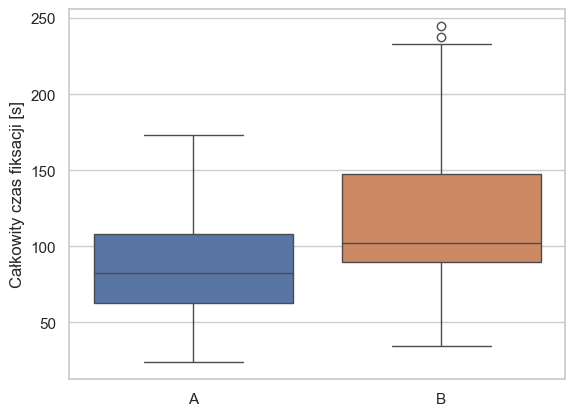

Bez polecenia:


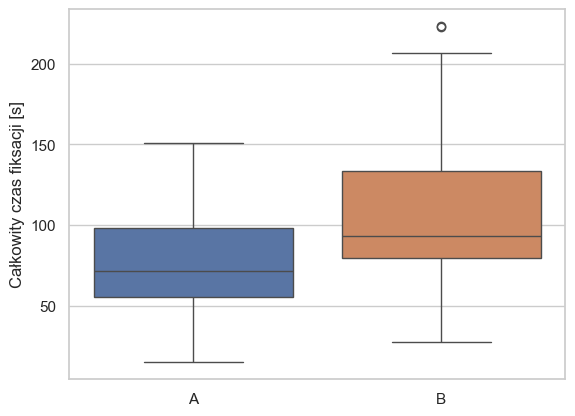

Tylko polecenie:


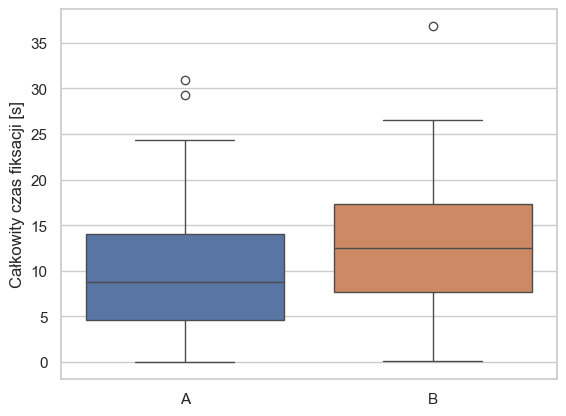

------------------------------------------
AVG
Z poleceniem:


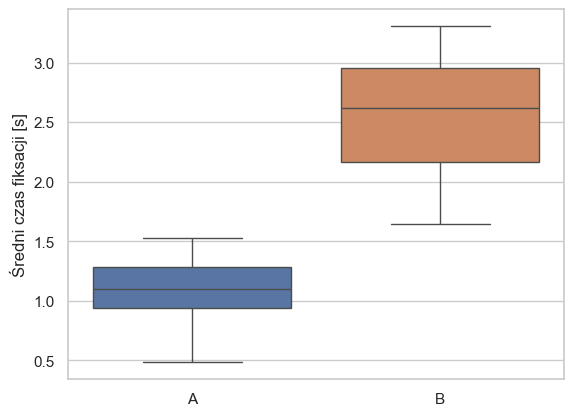

Bez polecenia:


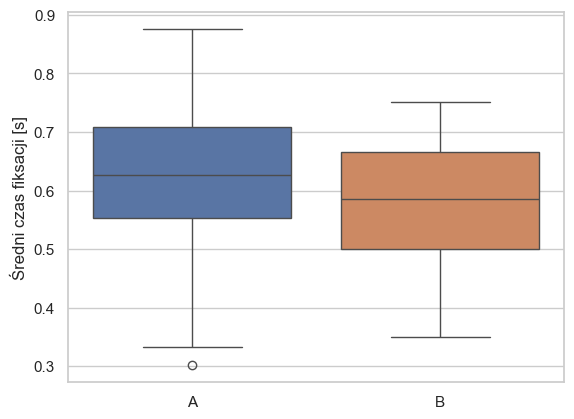

Tylko polecenie:


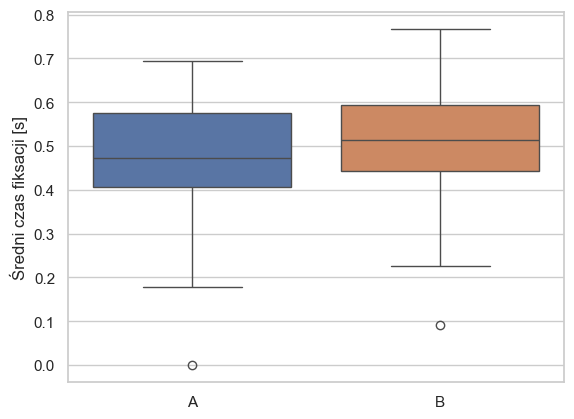

------------------------------------------
NUM
Z poleceniem:


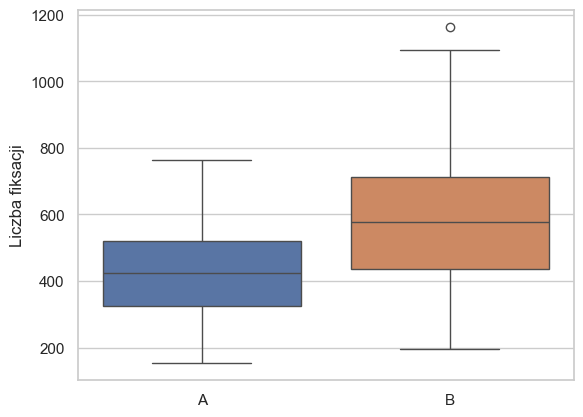

Bez polecenia:


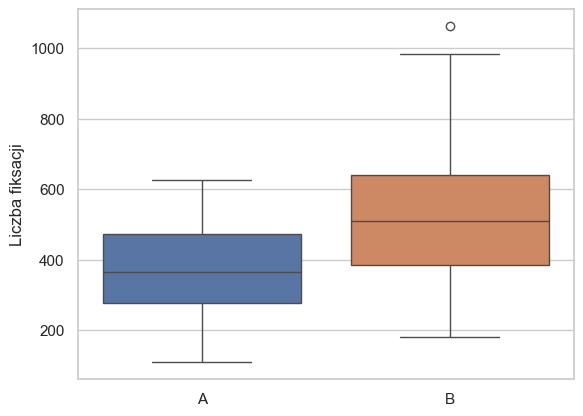

Tylko polecenie:


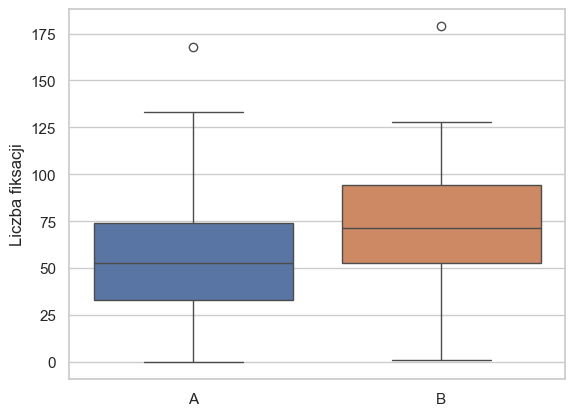

In [54]:
# sum
var = 'Total'
title = ''
print('TOTAL')
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

print('------------------------------------------')
print('AVG')
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)
 
print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)

print('------------------------------------------')
print('NUM')
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

In [55]:
def c_boxplot(var, desc, y1, y2, p1, p2, p3, df_1a_prefixed, df_1b_prefixed, df_2a_prefixed, df_2b_prefixed, df_3a_prefixed, df_3b_prefixed):
    
    df_new = pd.concat([df_1a_prefixed[f'1A_{var}_with_com'], df_1b_prefixed[f'1B_{var}_with_com'], 
                    df_2a_prefixed[f'2A_{var}_with_com'], df_2b_prefixed[f'2B_{var}_with_com'], 
                    df_3a_prefixed[f'3A_{var}_with_com'], df_3b_prefixed[f'3B_{var}_with_com']], axis=1)

    value_vars = [f'1A_{var}_with_com', f'1B_{var}_with_com', f'2A_{var}_with_com', 
            f'2B_{var}_with_com', f'3A_{var}_with_com', f'3B_{var}_with_com']
    
    if var != 'Num':
        for val in value_vars:
            df_new[val] = df_new[val]/1000
    
    df_long = pd.melt(df_new, 
                      value_vars=[f'1A_{var}_with_com', f'1B_{var}_with_com', f'2A_{var}_with_com', 
                                  f'2B_{var}_with_com', f'3A_{var}_with_com', f'3B_{var}_with_com'],
                      var_name='Pair', value_name='Value')

    colors = sns.color_palette('pastel', n_colors=2)
    hue_order = [f'1A_{var}_with_com', f'1B_{var}_with_com', f'2A_{var}_with_com', 
                 f'2B_{var}_with_com', f'3A_{var}_with_com', f'3B_{var}_with_com']

    labels = ['1A', '1B', '2A', '2B', '3A', '3B']

    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(data=df_long, x='Pair', y='Value', 
                     hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
    
    if p1:
        plt.annotate('', xy=(0.08, 1.025), xycoords='axes fraction', xytext=(0.26, 1.025),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.17, 1.005), xycoords='axes fraction', textcoords='axes fraction',
                 ha='center', va='bottom', fontsize=15)
    
    if p2:
        plt.annotate('', xy=(0.41, 1.025), xycoords='axes fraction', xytext=(0.58, 1.025),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.5, 1.005), xycoords='axes fraction', textcoords='axes fraction',
                 ha='center', va='bottom', fontsize=15)
        
    if p3:
        plt.annotate('', xy=(0.75, 1.025), xycoords='axes fraction', xytext=(0.92, 1.025),
                     textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
        plt.annotate('*', xy=(0.83, 1.005), xycoords='axes fraction', textcoords='axes fraction',
                 ha='center', va='bottom', fontsize=15)
    
    plt.xlabel('')
    plt.ylim(y1, y2)
    ax.set_xticklabels(labels)
    plt.ylabel(desc)
    plt.show()

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:27: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


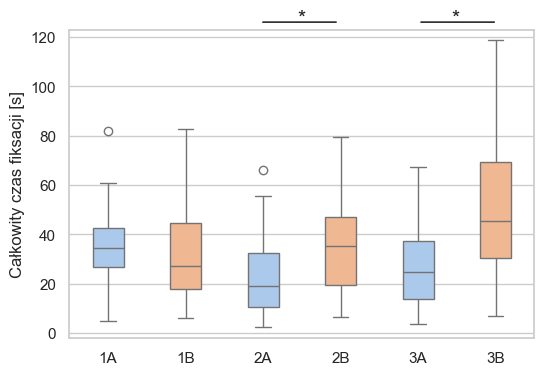

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:27: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


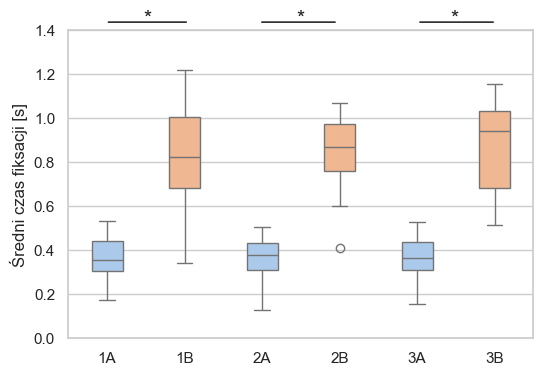

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:27: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


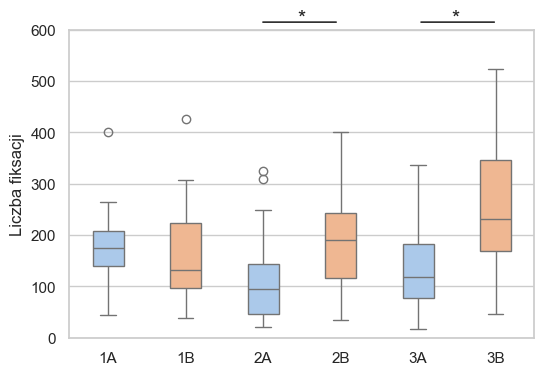

In [56]:
# fixations

df_1a_prefixed = df_1a_f.add_prefix('1A_')
df_1b_prefixed = df_1b_f.add_prefix('1B_')
df_2a_prefixed = df_2a_f.add_prefix('2A_')
df_2b_prefixed = df_2b_f.add_prefix('2B_')
df_3a_prefixed = df_3a_f.add_prefix('3A_')
df_3b_prefixed = df_3b_f.add_prefix('3B_')

c_boxplot('Total', 'Całkowity czas fiksacji [s]', -2, 123, False, True, True, 
          df_1a_prefixed, df_1b_prefixed, df_2a_prefixed, df_2b_prefixed, df_3a_prefixed, df_3b_prefixed)

c_boxplot('Avg', 'Średni czas fiksacji [s]', 0, 1.4, True, True, True, 
          df_1a_prefixed, df_1b_prefixed, df_2a_prefixed, df_2b_prefixed, df_3a_prefixed, df_3b_prefixed)

c_boxplot('Num', 'Liczba fiksacji', 0, 600, False, True, True, 
          df_1a_prefixed, df_1b_prefixed, df_2a_prefixed, df_2b_prefixed, df_3a_prefixed, df_3b_prefixed)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


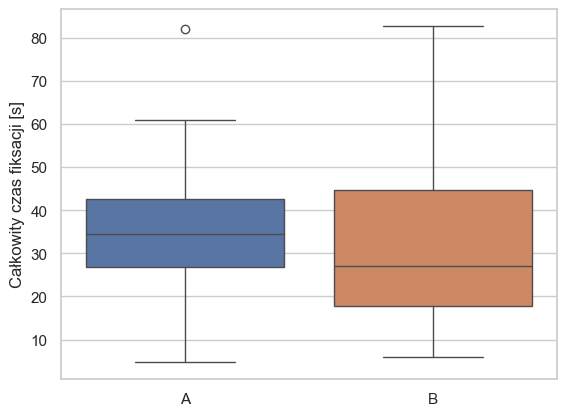

Bez polecenia:


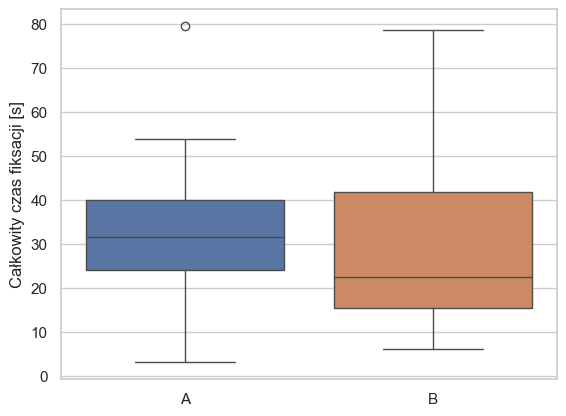

Tylko polecenie:


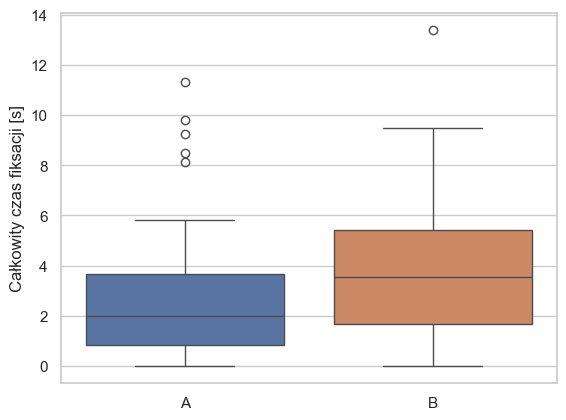

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


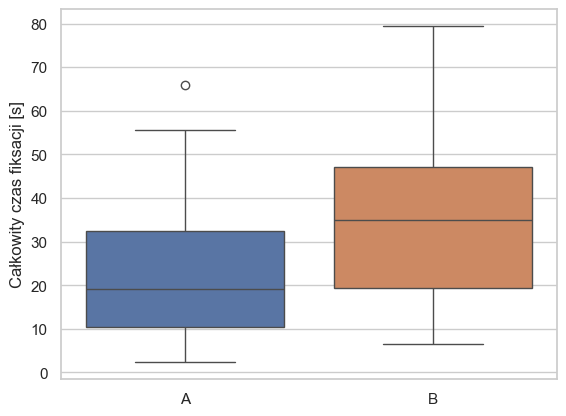

Bez polecenia:


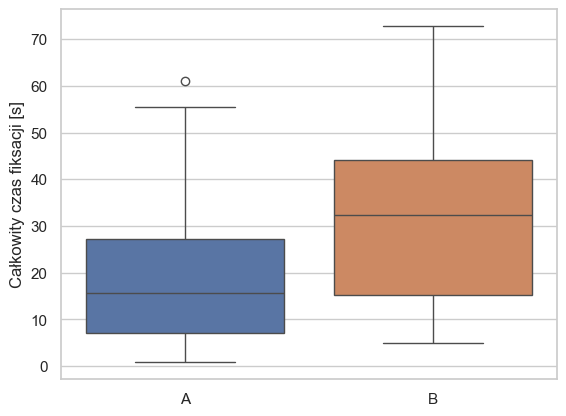

Tylko polecenie:


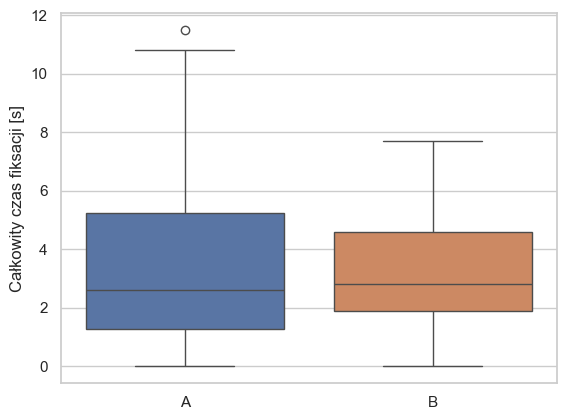

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


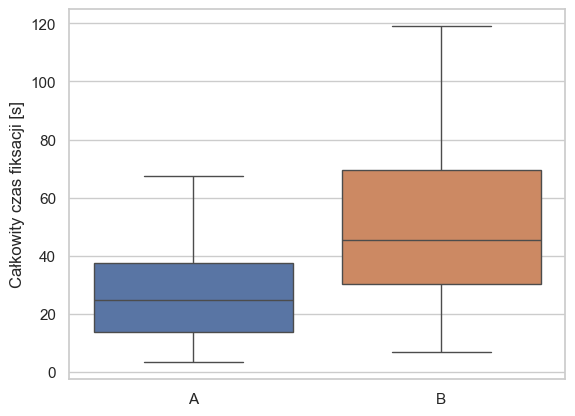

Bez polecenia:


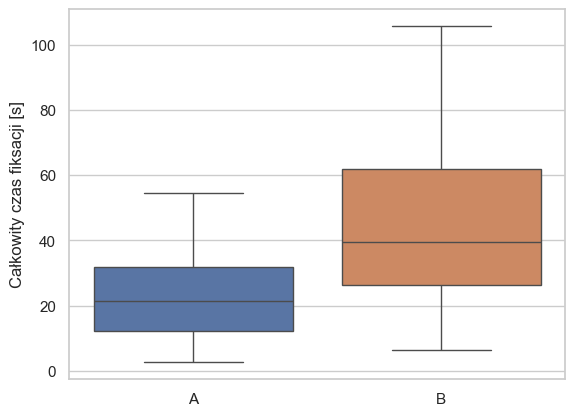

Tylko polecenie:


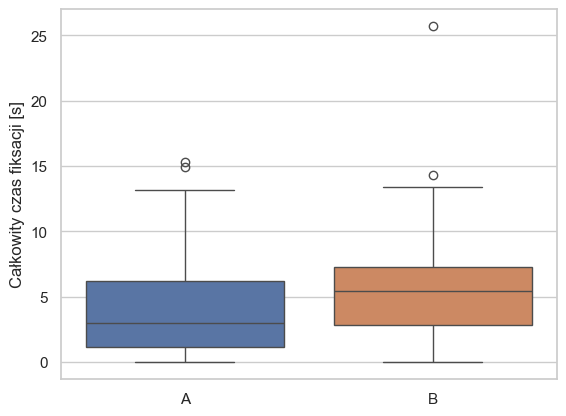

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


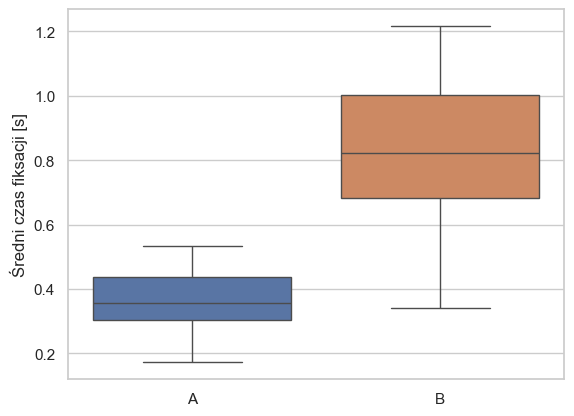

Bez polecenia:


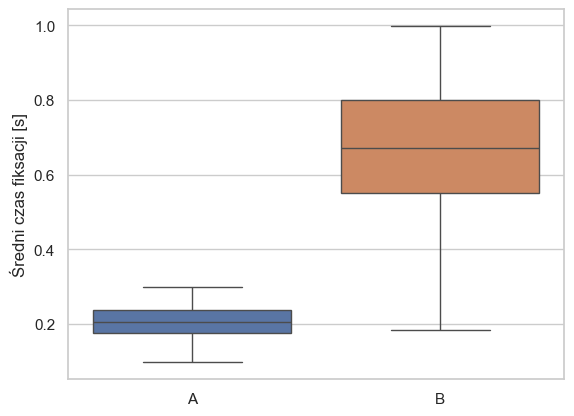

Tylko polecenie:


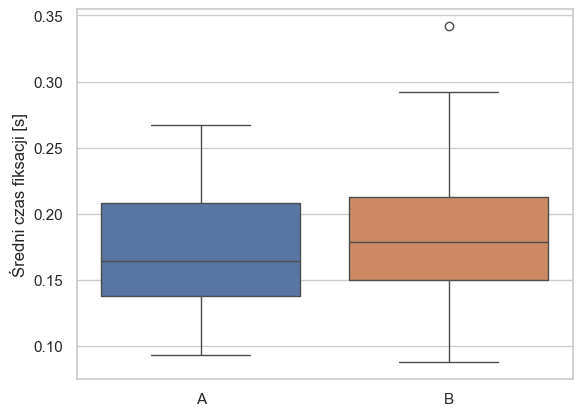

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


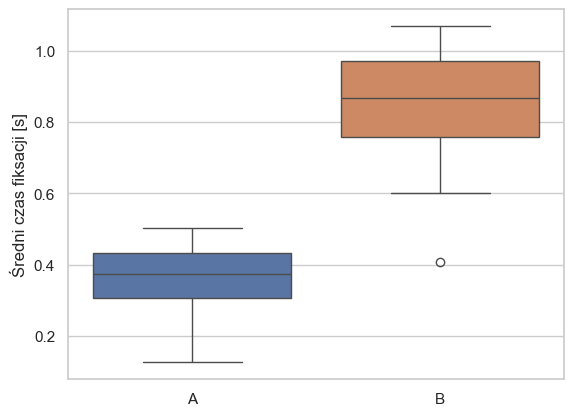

Bez polecenia:


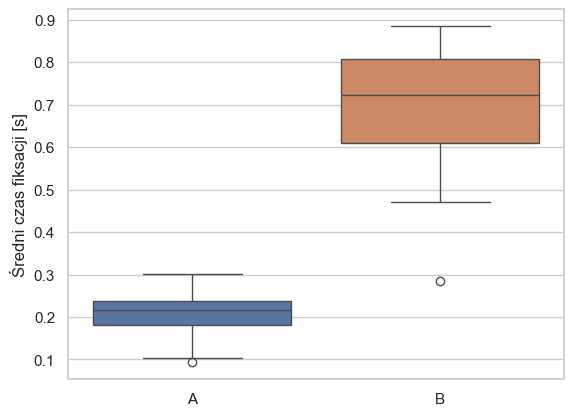

Tylko polecenie:


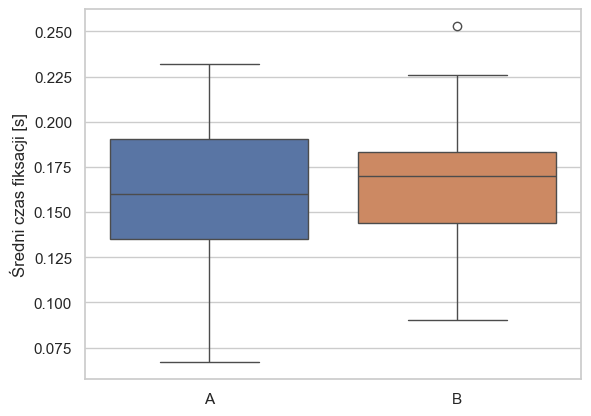

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


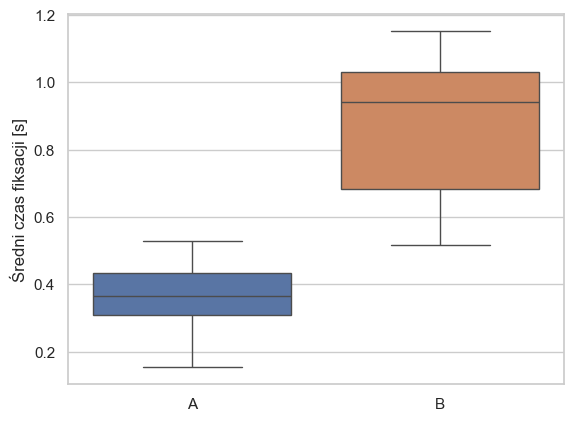

Bez polecenia:


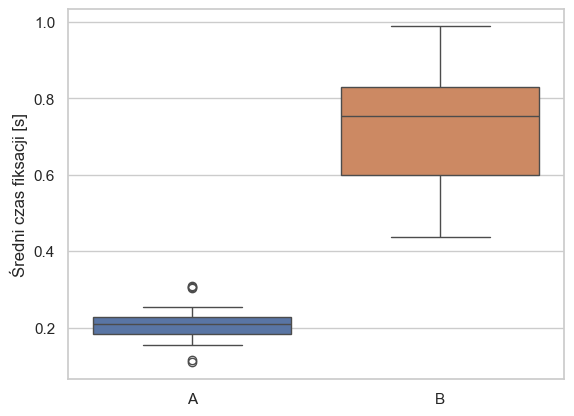

Tylko polecenie:


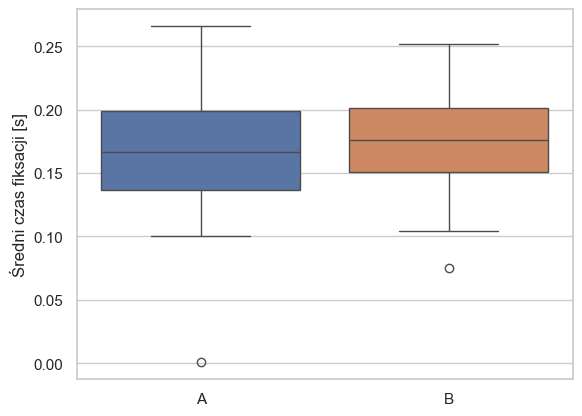

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


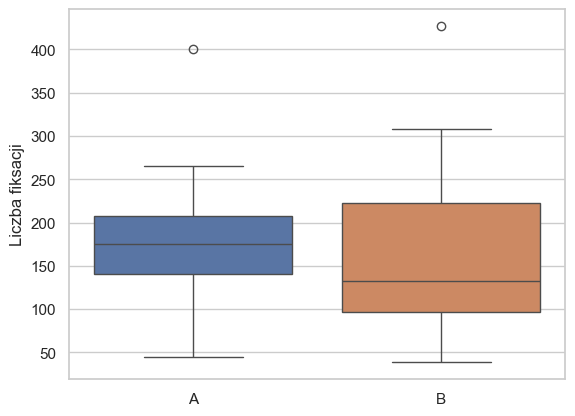

Bez polecenia:


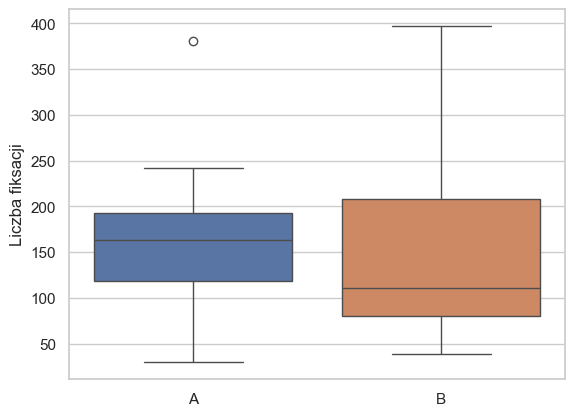

Tylko polecenie:


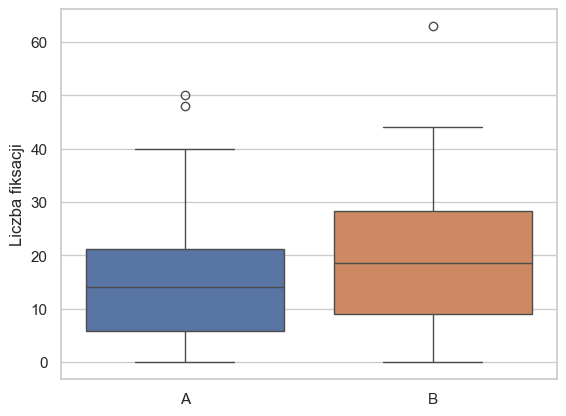

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


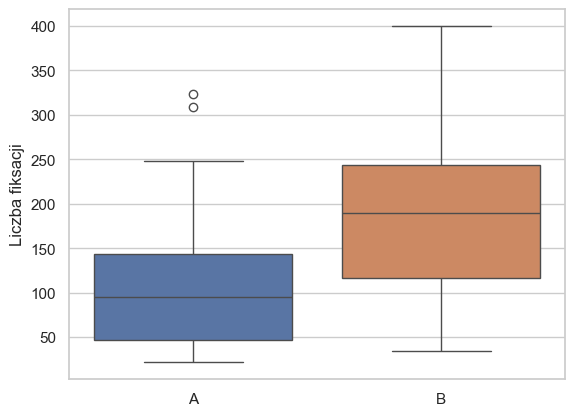

Bez polecenia:


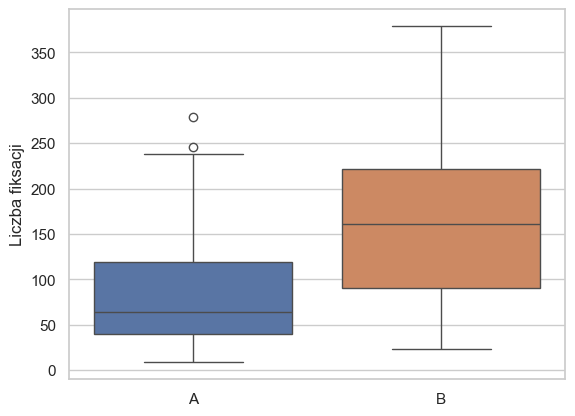

Tylko polecenie:


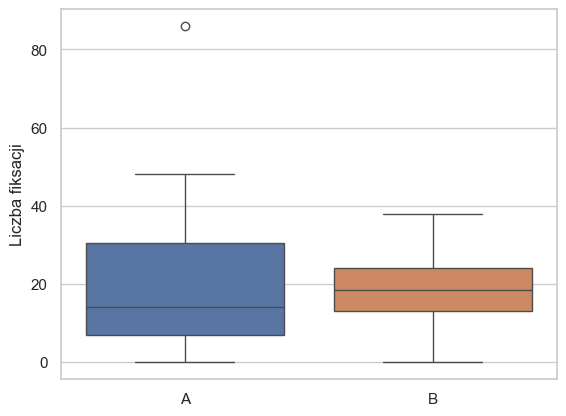

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


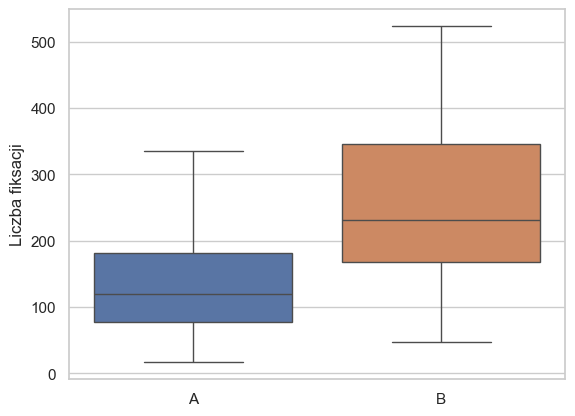

Bez polecenia:


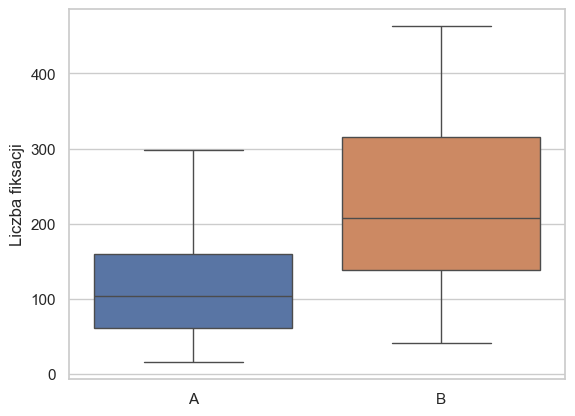

Tylko polecenie:


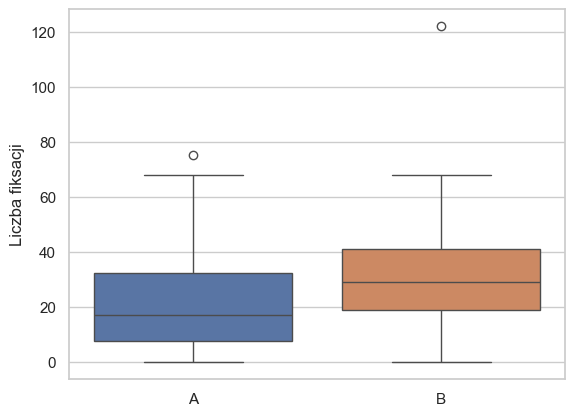

In [57]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

var = 'Avg'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)

var = 'Num'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

### Plots - visits:

TOTAL
Z poleceniem:


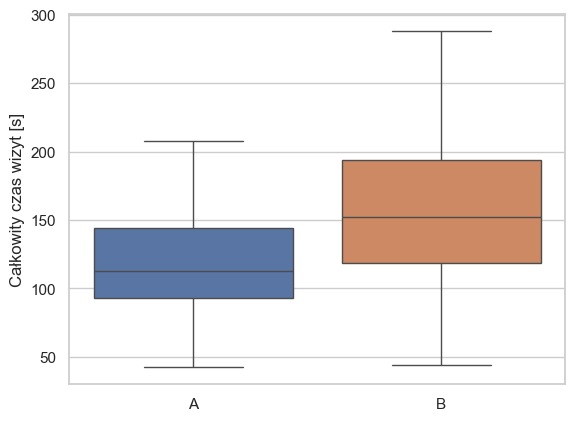

Bez polecenia:


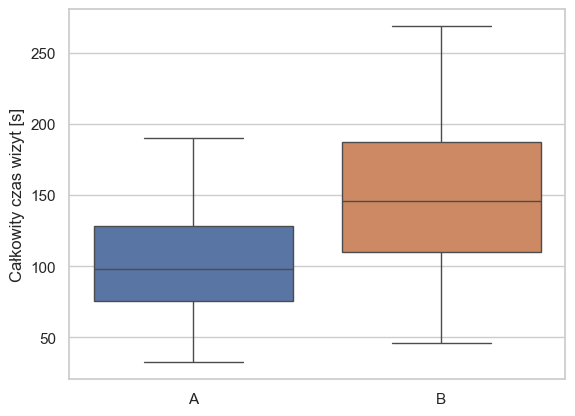

Tylko polecenie:


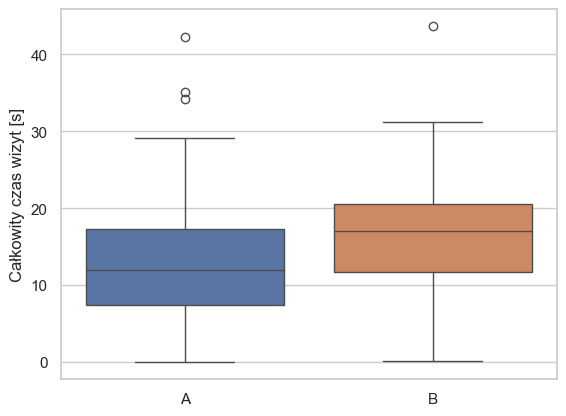

------------------------------------------
AVG
Z poleceniem:


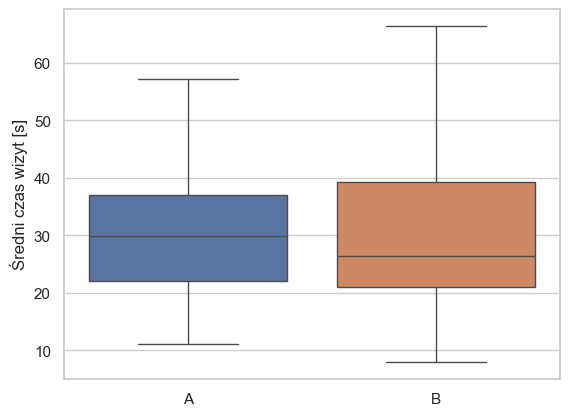

Bez polecenia:


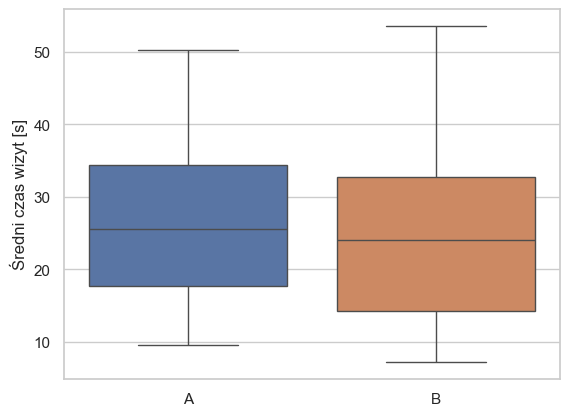

Tylko polecenie:


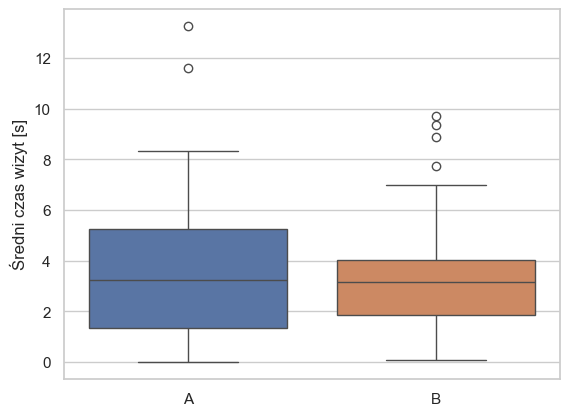

------------------------------------------
NUM
Z poleceniem:


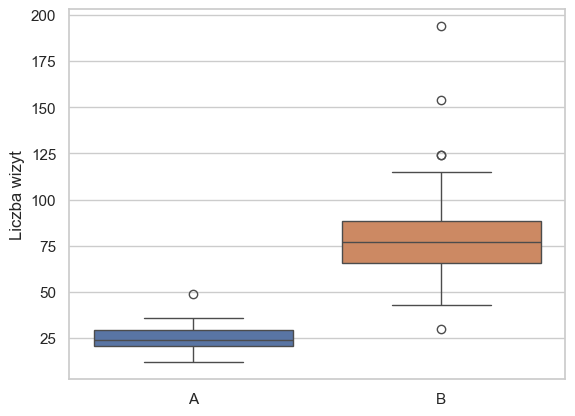

Bez polecenia:


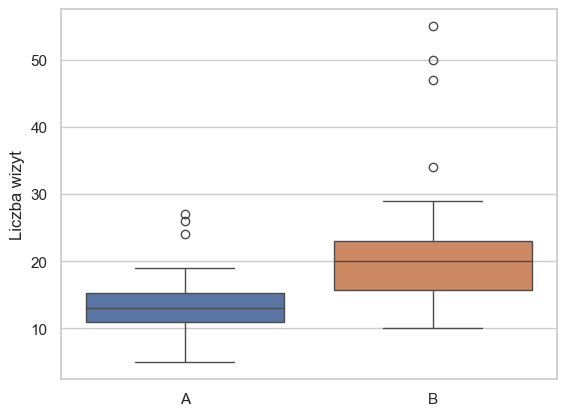

Tylko polecenie:


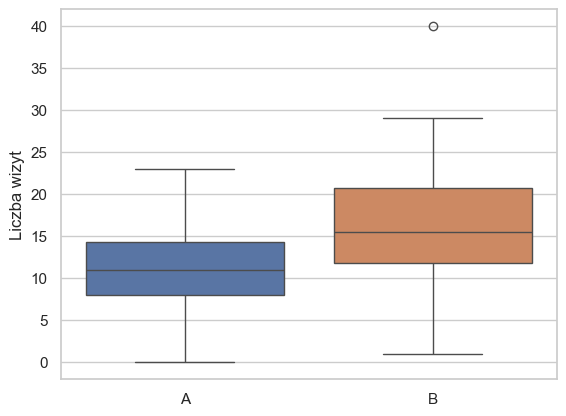

In [58]:
# sum
var = 'Total'
print('TOTAL')
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

print('------------------------------------------')
print('AVG')
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

print('------------------------------------------')
print('NUM')
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:27: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


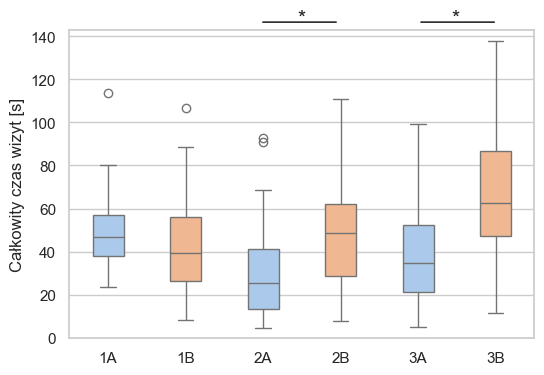

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:27: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


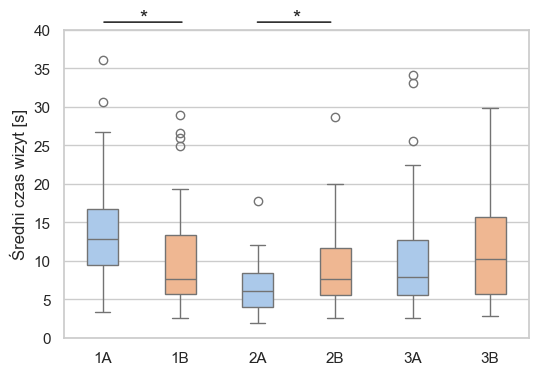

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:27: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1892/3187448527.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


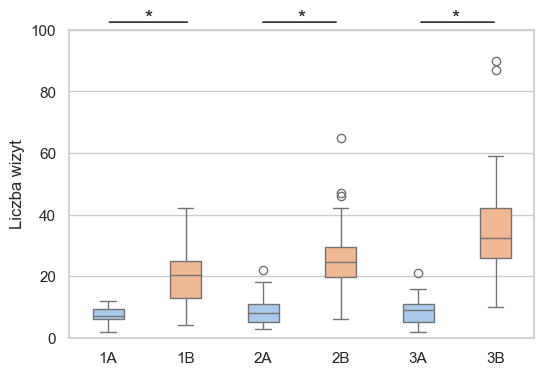

In [59]:
# visits

df_1a_prefixed = df_1a_v.add_prefix('1A_')
df_1b_prefixed = df_1b_v.add_prefix('1B_')
df_2a_prefixed = df_2a_v.add_prefix('2A_')
df_2b_prefixed = df_2b_v.add_prefix('2B_')
df_3a_prefixed = df_3a_v.add_prefix('3A_')
df_3b_prefixed = df_3b_v.add_prefix('3B_')

c_boxplot('Total', 'Całkowity czas wizyt [s]', 0, 143, False, True, True, 
          df_1a_prefixed, df_1b_prefixed, df_2a_prefixed, df_2b_prefixed, df_3a_prefixed, df_3b_prefixed)

c_boxplot('Avg', 'Średni czas wizyt [s]', 0, 40, True, True, False,
            df_1a_prefixed, df_1b_prefixed, df_2a_prefixed, df_2b_prefixed, df_3a_prefixed, df_3b_prefixed)

c_boxplot('Num', 'Liczba wizyt', 0, 100, True, True, True,
            df_1a_prefixed, df_1b_prefixed, df_2a_prefixed, df_2b_prefixed, df_3a_prefixed, df_3b_prefixed)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


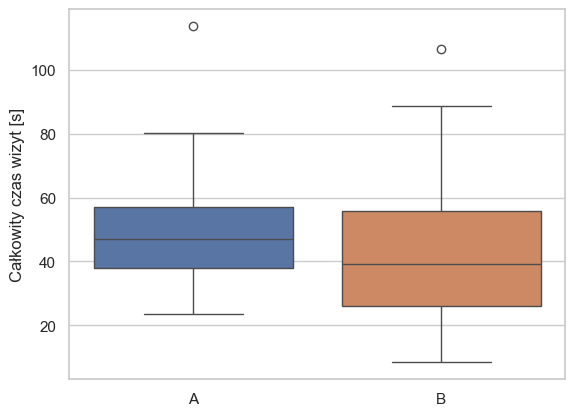

Bez polecenia:


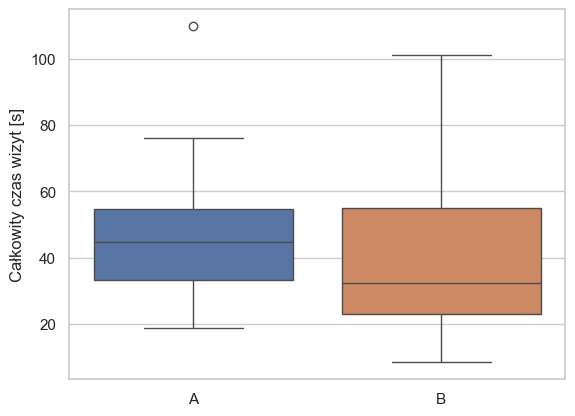

Tylko polecenie:


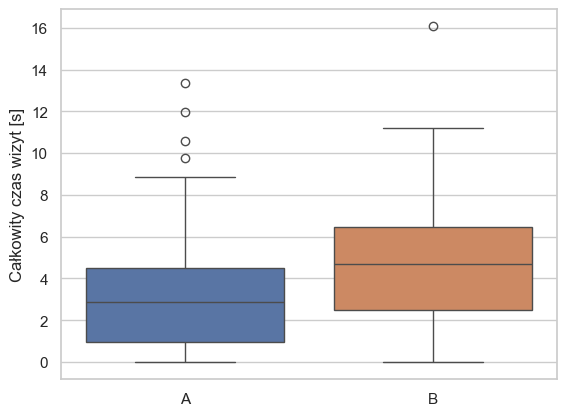

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


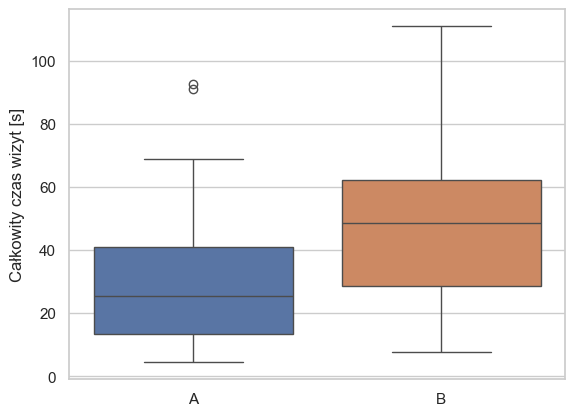

Bez polecenia:


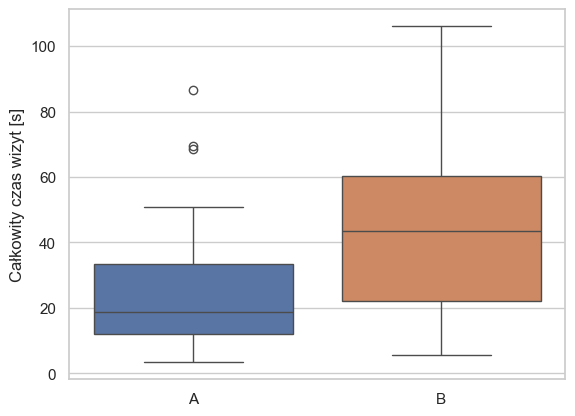

Tylko polecenie:


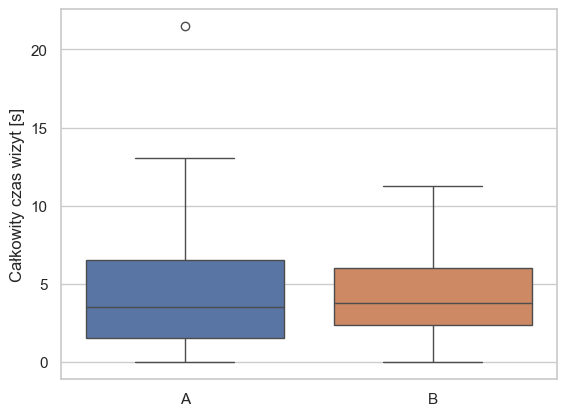

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


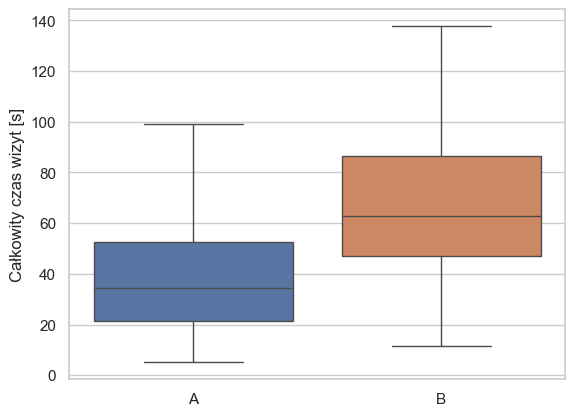

Bez polecenia:


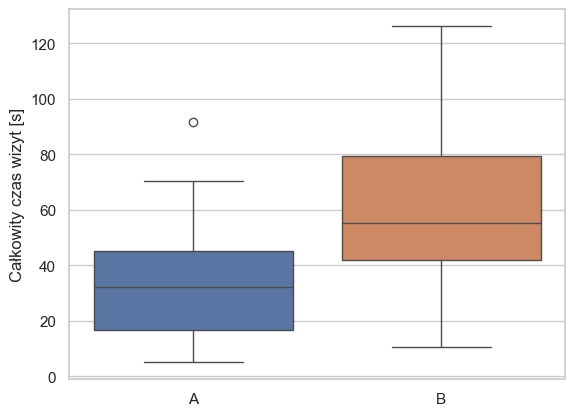

Tylko polecenie:


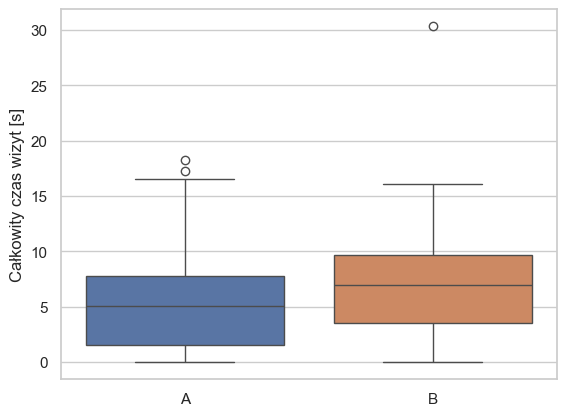

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


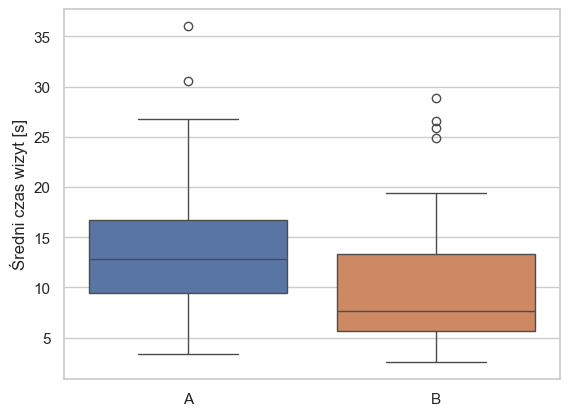

Bez polecenia:


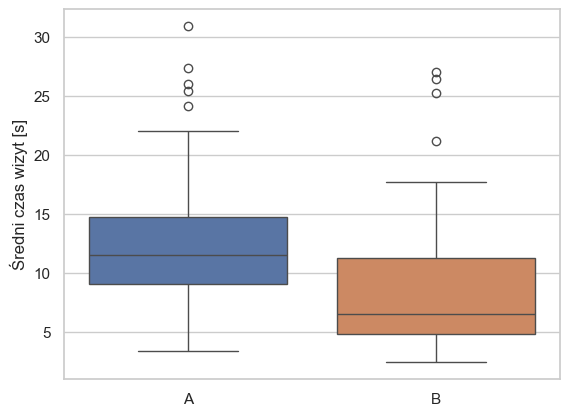

Tylko polecenie:


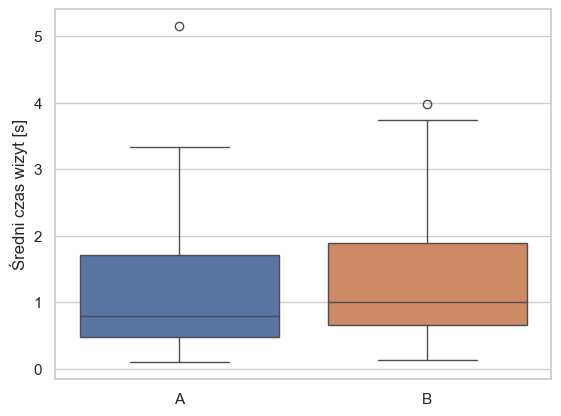

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


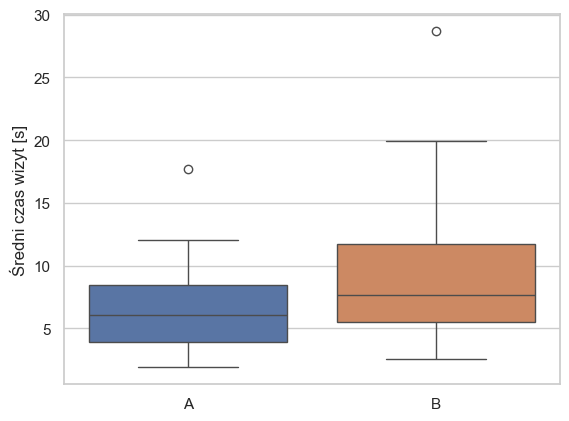

Bez polecenia:


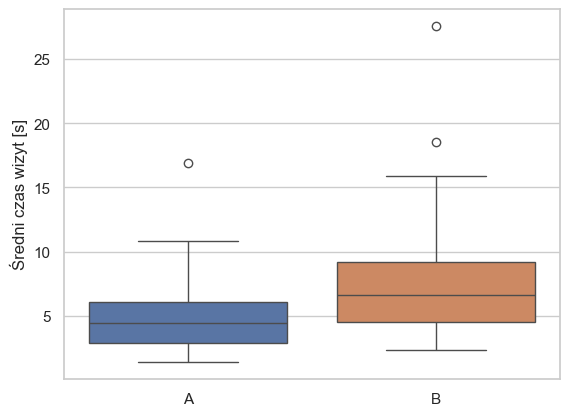

Tylko polecenie:


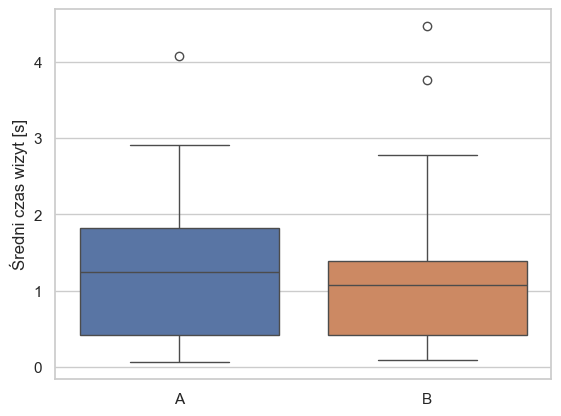

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


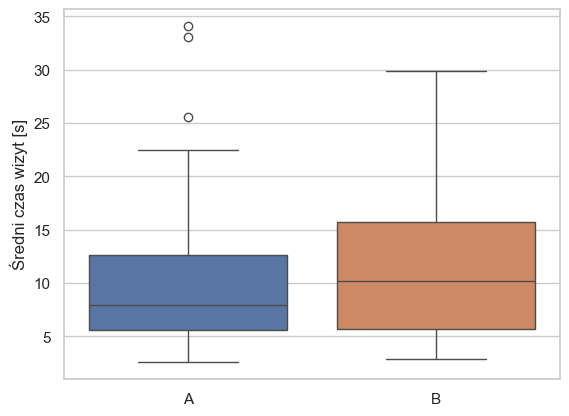

Bez polecenia:


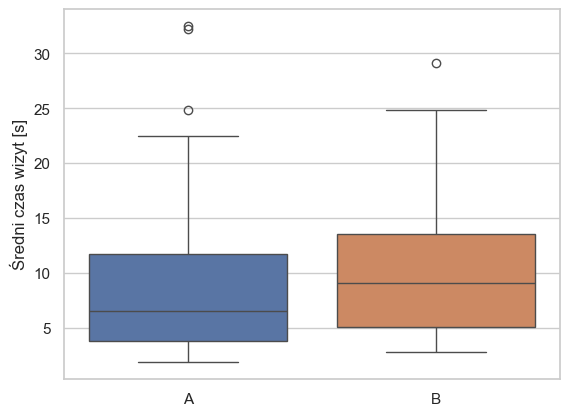

Tylko polecenie:


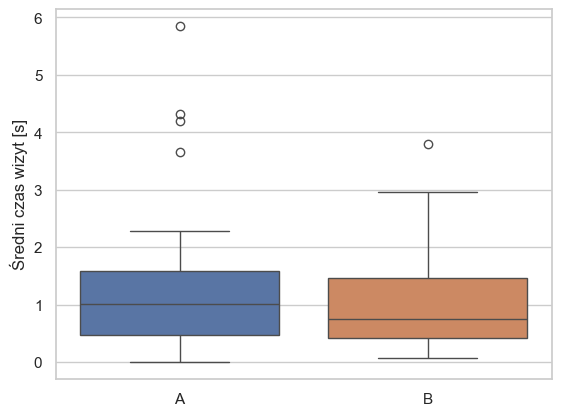

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


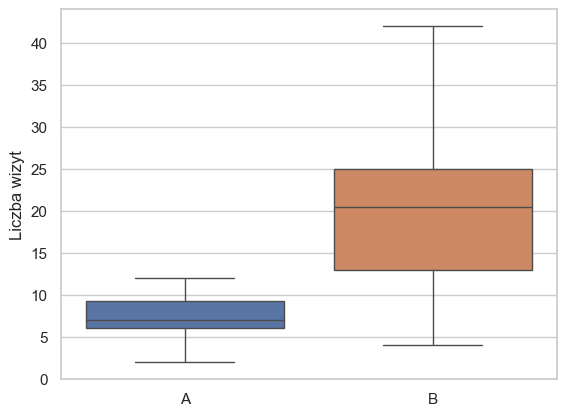

Bez polecenia:


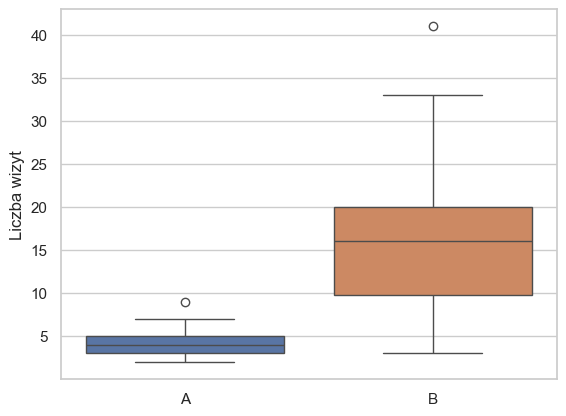

Tylko polecenie:


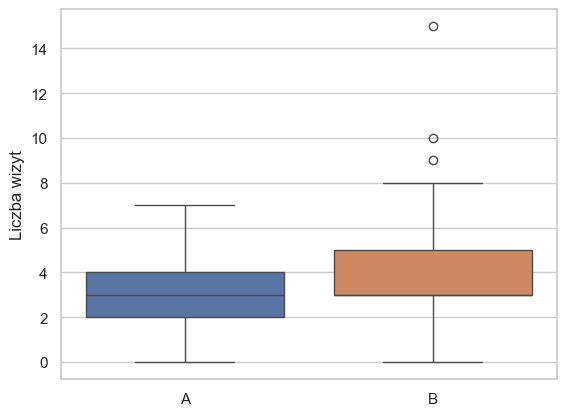

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


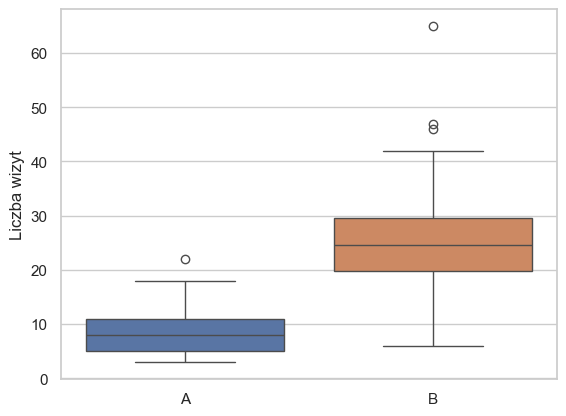

Bez polecenia:


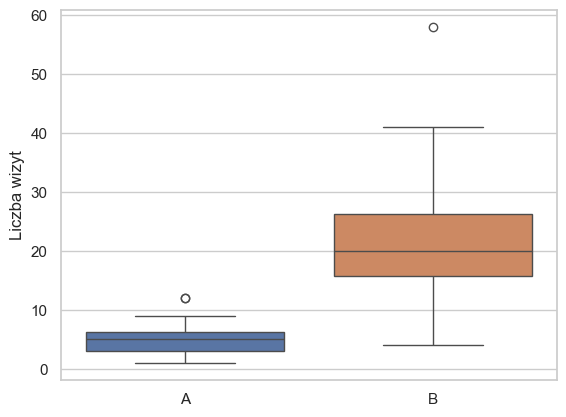

Tylko polecenie:


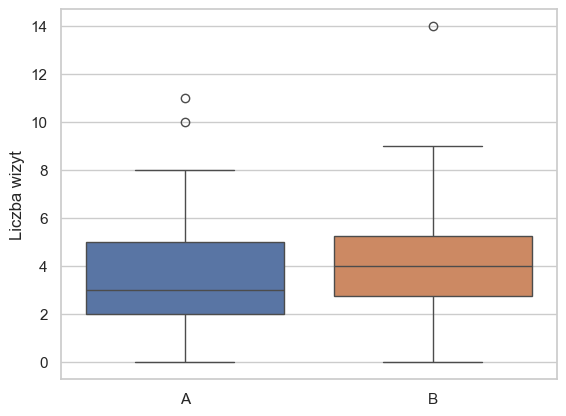

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


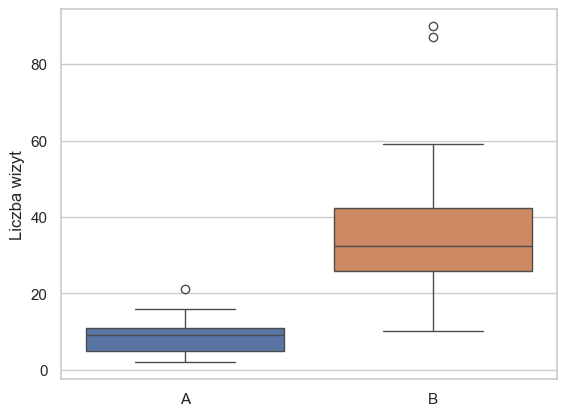

Bez polecenia:


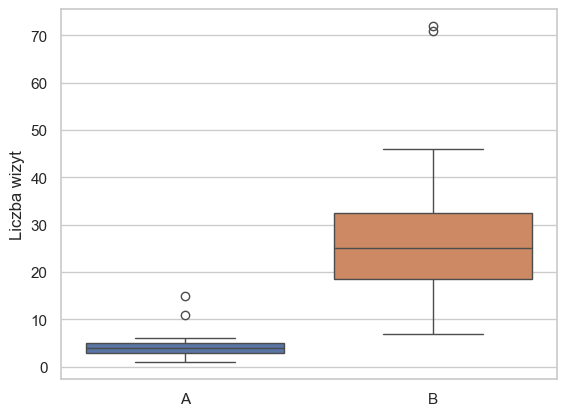

Tylko polecenie:


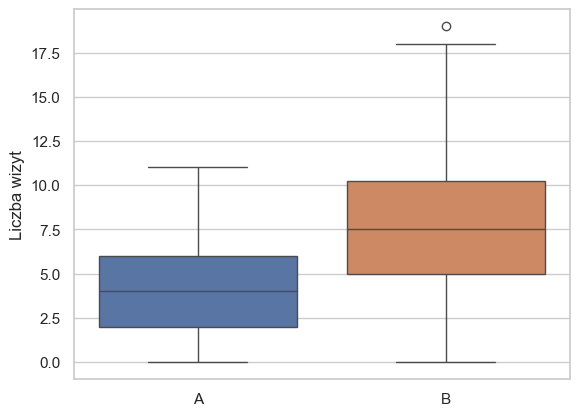

In [60]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

var = 'Avg'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

var = 'Num'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)